<a href="https://colab.research.google.com/github/filipecarbonera/bootcamp_data_science/blob/main/Modulo03/bootcamp_data_science_modulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas.

import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Aula 01 - parte 1**

In [ ]:
# Buscando os dados gerais.

url = 'https://github.com/alura-cursos/Prophet_covid/raw/main/dados_covid_sp.zip'

dados = pd.read_csv(url, sep=';')
dados.head()

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
0        Adamantina      3500105   25  ...  -21,6820  -51,0737              9
1            Adolfo      3500204   25  ...  -21,2325  -49,6451              9
2             Aguaí      3500303   25  ...  -22,0572  -46,9735              9
3    Águas da Prata      3500402   25  ...  -21,9319  -46,7176              9
4  Águas de Lindóia      3500501   25  ...  -22,4733  -46,6314              9

[5 rows x 26 columns]

In [ ]:
# Alterando o formato da culuna 'datahora' para datetime.
dados['datahora'] = pd.to_datetime(dados['datahora'], format='%Y-%m-%d')

In [ ]:
# Criando dataset apenas para a cidade de São Paulo.
dados_sp = dados.query('nome_munic == "São Paulo"')
dados_sp.head()

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
562   São Paulo      3550308   25  ...  -23,5329  -46,6395              9
1207  São Paulo      3550308   26  ...  -23,5329  -46,6395              9
1852  São Paulo      3550308   27  ...  -23,5329  -46,6395              9
2497  São Paulo      3550308   28  ...  -23,5329  -46,6395              9
3142  São Paulo      3550308   29  ...  -23,5329  -46,6395              9

[5 rows x 26 columns]

In [ ]:
# Padronizando os parametros de todos os gráficos que serão plotados.
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (10,6)

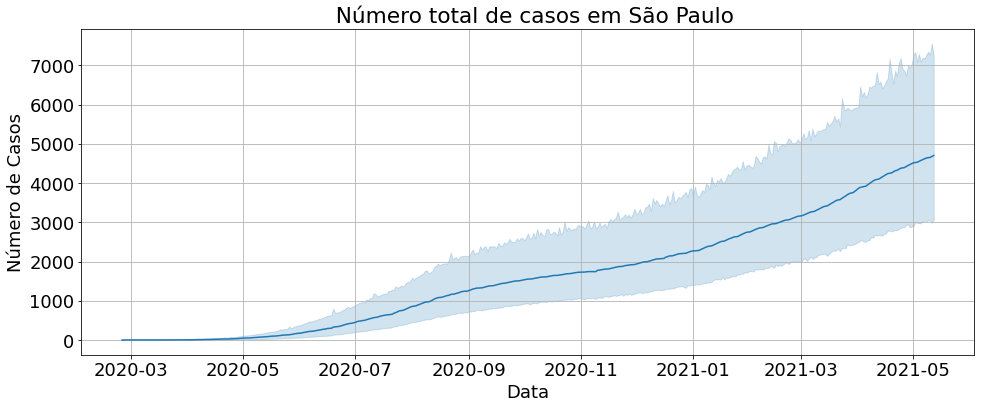

In [ ]:
plt.figure(figsize=(16,6))
plt.title('  Número total de casos em São Paulo')
plt.grid()
plt.xlabel('Data')
plt.ylabel('Número de Casos')

# Plotando o gráfico dos casos do estado de São Paulo.
sns.lineplot(data= dados ,x= 'datahora', y= 'casos')

# Esse gráfico é semelhante a uma curva exponencial...

Supõe-se que esse gráfico é bastante semelhante a uma curva exponencial, então vamos comparar eles a partir daqui.

$$ log_2 2 = 1 $$
$$ log_2 2^x = x $$
$$ log_e e^x = x $$

In [ ]:
# Criando os eixos da curva exponencial.
eixo_x = np.linspace(-2,2,100)
y_exp = np.exp(eixo_x)

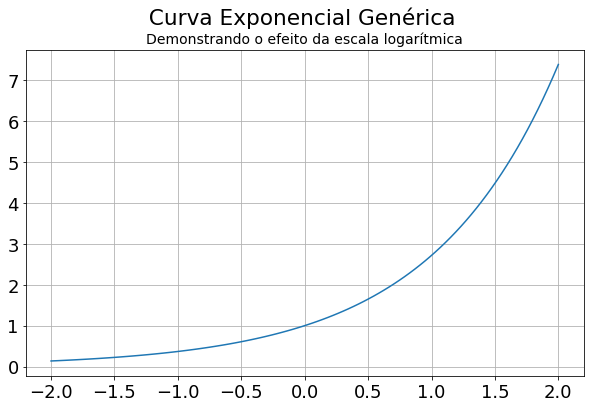

In [ ]:
plt.figure(figsize=(10,6))
plt.suptitle('  Curva Exponencial Genérica')
plt.title('Demonstrando o efeito da escala logarítmica', fontsize=14)
plt.grid()

# Então vamos visualizar uma curva exponencial...
sns.lineplot(x= eixo_x, y= y_exp)

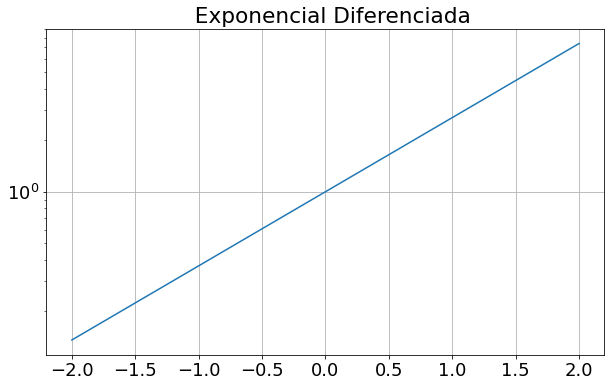

In [ ]:
plt.figure(figsize=(10,6))
plt.title('  Exponencial Diferenciada')
plt.grid()

sns.lineplot(x= eixo_x, y= y_exp)
mpl.pyplot.yscale('log')

# E perceber que quando aplicamos uma escala logaritmica a uma curva exponencial obtemos uma reta...

In [ ]:
# Então, vamos aplicar essa escala logaritmica ao gráfico dos casos da cidade de São Paulo.
# Se obtermos uma reta, significa que o aumento no número de casos é exponencial.

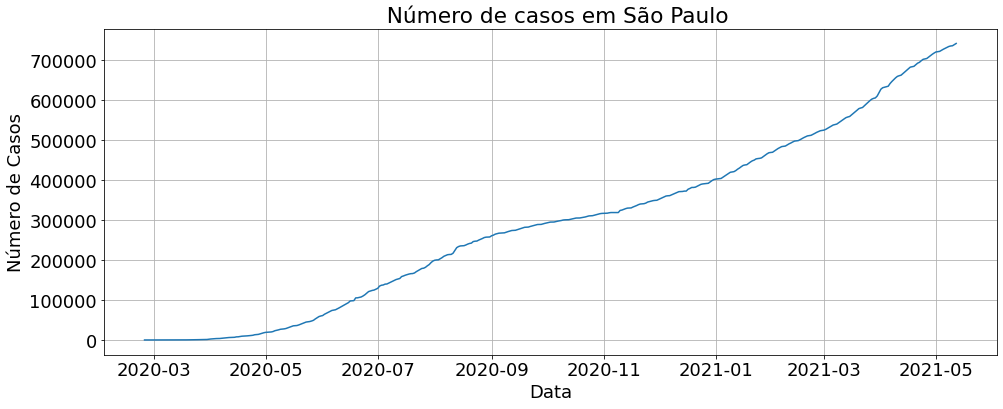

In [ ]:
plt.figure(figsize=(16,6))
plt.title('  Número de casos em São Paulo')
plt.grid()
plt.xlabel('Data')
plt.ylabel('Número de Casos')

# Este é o gráfico original, da cidade de São Paulo...
sns.lineplot(x= 'datahora', y= 'casos', data= dados_sp)

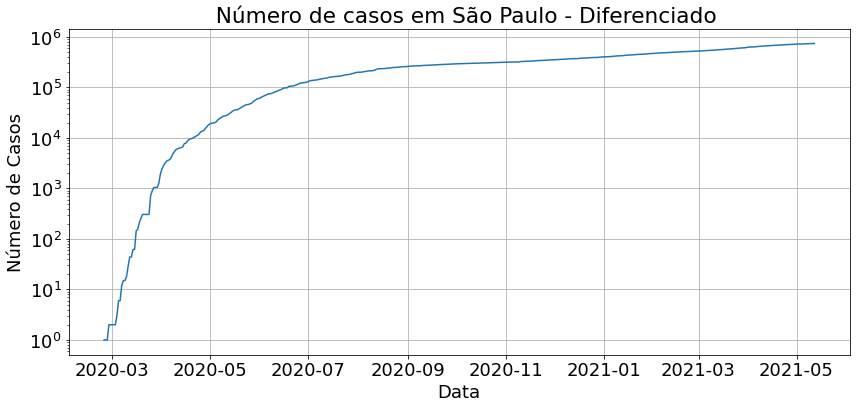

In [ ]:
plt.figure(figsize=(14,6))
plt.title('  Número de casos em São Paulo - Diferenciado')
plt.grid()
plt.xlabel('Data')
plt.ylabel('Número de Casos')

# E este é o com a escala logaritmica aplicada.
sns.lineplot(x= 'datahora', y= 'casos', data= dados_sp)
mpl.pyplot.yscale('log')

Percebemos que não se trata de uma reta simples, mas podemos generalizar e perceber que o gráfico é formado por 3 retas em momentos diferentes. Isso significa que a taxa de crescimento exponencial é diferente em cada um desses momentos.

### Variáveis que temos até aqui:

- dados (estado de São Paulo)
- dados_sp (cidade de São Paulo)
- dados_sbc (São Bernardo do Campo)

##Desafios:

**Desafio 1:** Filtrar a base de dados com alguma outra função.

**Desafio 2:** Fazer a análise novamente com outra cidade ou estado.

### Desafio 1:

In [ ]:
#São Bernardo do Campo
dados = dados.set_index('nome_munic')
dados_sbc = dados.T['São Bernardo do Campo']
dados_sbc = dados_sbc.T
dados_sbc.reset_index()
dados_sbc.head()

codigo_ibge dia mes  ...  latitude longitude semana_epidem
nome_munic                                 ...                                  
São Bernardo do Campo     3548708  25   2  ...  -23,6914  -46,5646             9
São Bernardo do Campo     3548708  26   2  ...  -23,6914  -46,5646             9
São Bernardo do Campo     3548708  27   2  ...  -23,6914  -46,5646             9
São Bernardo do Campo     3548708  28   2  ...  -23,6914  -46,5646             9
São Bernardo do Campo     3548708  29   2  ...  -23,6914  -46,5646             9

[5 rows x 25 columns]

### Desafio 2:

Dados de São Bernardo do Campo.

In [ ]:
dados_sbc['casos'] = dados_sbc['casos'].astype(int)

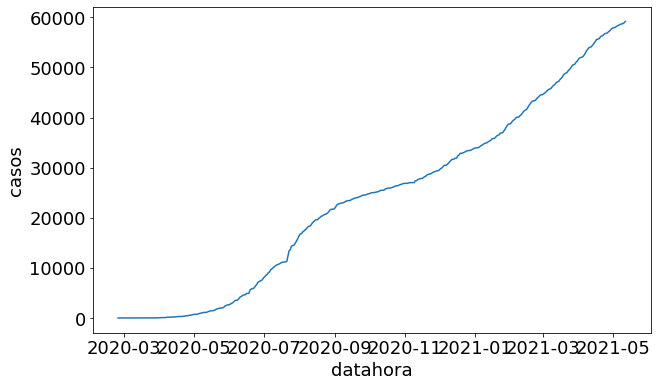

In [ ]:
sns.lineplot(data= dados_sbc ,x= 'datahora', y= 'casos')

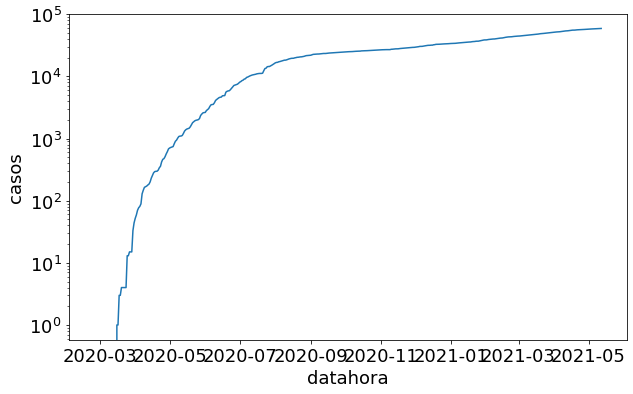

In [ ]:
sns.lineplot(x= 'datahora', y= 'casos', data= dados_sbc)
mpl.pyplot.yscale('log')

Aparentemente o comportamento do gráfico da cidade de São Paulo e de São Bernardo do Campo é bastante semelhante.

É possível perceber, porém, que no caso de São Bernardo do Campo a curva segue um pouco menos a escala logarítmica.

# **Aula 01 - parte 2**

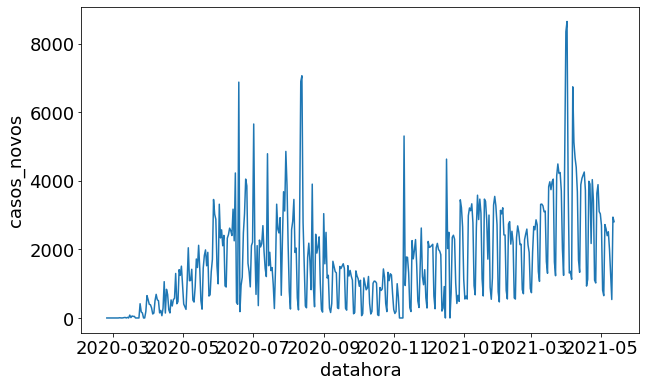

In [ ]:
# Nesta aula vamos trabalhar com o número de casos por dia, não mais o número acumulado.
sns.lineplot(data= dados_sp, x='datahora', y='casos_novos')

# Evidentemente é um gráfico muito menos suave/linear do que os vistos até então.

In [ ]:
# A ideia então, para suavisar esse gráfico, é fazer uma Diferenciação.

### Para entender a diferenciação, vamos fazer um exemplo.

In [ ]:
# Criado o dataframe para o exemplo.
dados_exemplo = pd.DataFrame(data= np. linspace(1,10,10))

In [ ]:
dados_exemplo.head()

0
0  1.0
1  2.0
2  3.0
3  4.0
4  5.0

In [ ]:
# Criando a coluna com a Diferenciação.
dados_exemplo['diferenciado'] = dados_exemplo.diff()
dados_exemplo.head()

0  diferenciado
0  1.0           NaN
1  2.0           1.0
2  3.0           1.0
3  4.0           1.0
4  5.0           1.0

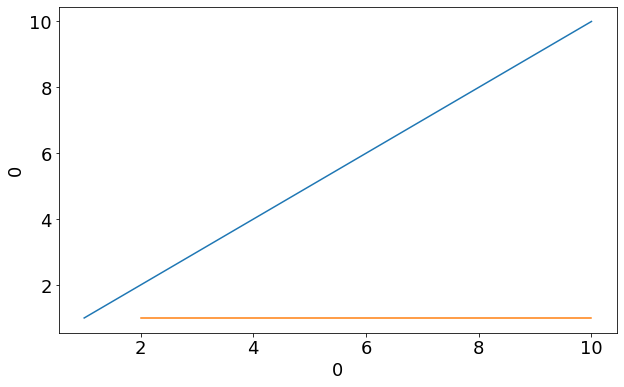

In [ ]:
# Plotando o gráfico com ambas as retas.
sns.lineplot(x=0, y=0, data= dados_exemplo)
sns.lineplot(x=0, y='diferenciado', data= dados_exemplo)

A Diferenciação é a taxa de crescimento de uma reta.
Como a reta inclinada (azul) está crescendo em 1 de forma constante, todos os valores da reta diferenciada (laranja) são 1, formando a reta horizontal.

Então, aplicando a Diferenciação aos demais gráficos, conseguimos visualizar a taxa de aumento/diminuição dos casos,obitos, etc.

### Continuando.

In [ ]:
# Criando as colunas com as Diferenciações (Taxas de Crescimento) de casos e obitos da cidade de São Paulo.
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

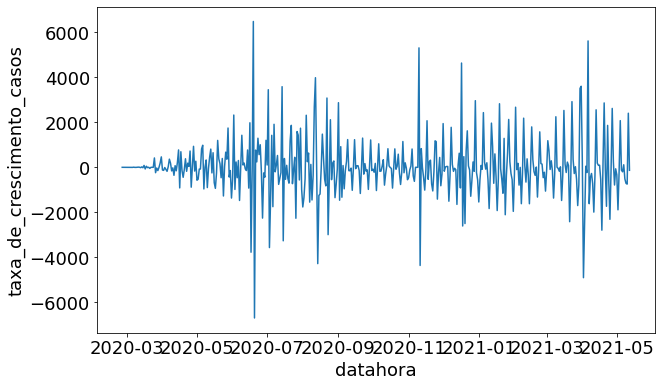

In [ ]:
# Plotando o gráfico da taxa de crescimento dos casos.
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data= dados_sp)

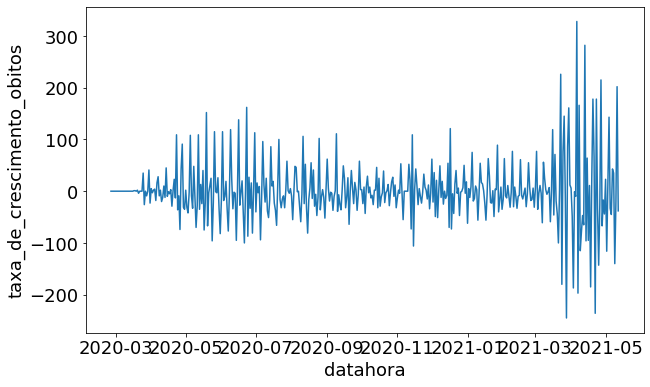

In [ ]:
# Plotando o gráfico da taxa de crescimento dos obitos.
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data= dados_sp)

<BarContainer object of 443 artists>

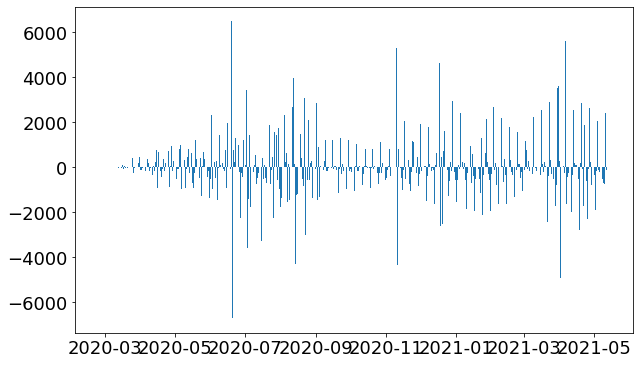

In [ ]:
# Em busca de uma melhor visualização para esses casos, plotamos um gráfico de barras.
plt.bar(dados_sp['datahora'], dados_sp['taxa_de_crescimento_casos'])

In [ ]:
# Criamos uma nova coluna 'ano' para que possamos fazer análises de anos especificos.
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year
dados_sp.head()

nome_munic  codigo_ibge  dia  ...  obitos -14 obitos -21  obitos -28
562   São Paulo      3550308   25  ...         0.0        1.0         0.0
1207  São Paulo      3550308   26  ...         0.0        2.0        35.0
1852  São Paulo      3550308   27  ...         0.0        2.0         9.0
2497  São Paulo      3550308   28  ...         0.0        4.0         9.0
3142  São Paulo      3550308   29  ...         0.0        0.0         0.0

[5 rows x 35 columns]

In [ ]:
# Criando o dataset do ano de 2021.
dados_2021 = dados_sp.query('ano==2021')
dados_2021.head()

nome_munic  codigo_ibge  dia  ...  obitos -14 obitos -21  obitos -28
201157  São Paulo      3550308    1  ...        98.0       60.0        51.0
201802  São Paulo      3550308    2  ...        75.0       61.0        59.0
202447  São Paulo      3550308    3  ...        19.0       12.0        24.0
203092  São Paulo      3550308    4  ...        12.0       16.0         8.0
203737  São Paulo      3550308    5  ...        75.0       19.0        71.0

[5 rows x 35 columns]

<BarContainer object of 132 artists>

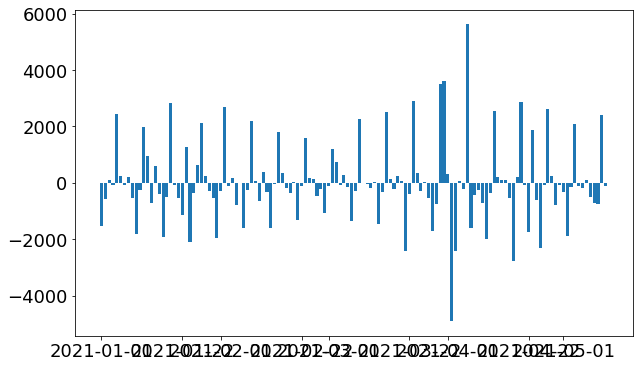

In [ ]:
# Plotando o gráfico de taxa de crescimento de casos de 2021.
plt.bar(dados_2021['datahora'], dados_2021['taxa_de_crescimento_casos'])

In [ ]:
# Criando as colunas de média móvel de casos e obitos.
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()

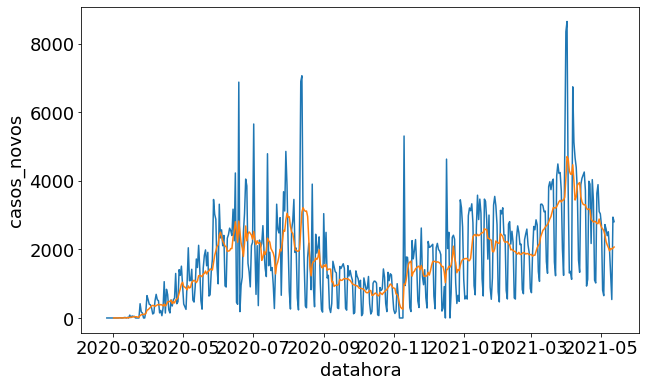

In [ ]:
# Plotando o gráfico de número de casos novos (azul) e da média movel de casos (laranja) para visualizarmos a diferença entre eles.
sns.lineplot(x='datahora', y='casos_novos', data= dados_sp)
sns.lineplot(x='datahora', y='media_movel_casos', data= dados_sp)

# A média móvel é claramente mais suavizada.

## **Desafios:**

**Desafio 1:** Retirar os Warnings do Notebook.

**Desafio 2:** Comparar os picos da taxa de casos novos com a taxa de obitos novos. Coincidem?

**Desafio 3:** Deixar os gráficos bonitos.

**Desafio 4:** Gerar o gráfico da média móvel do número de óbitos. Mudar os gráficos de casos de linha para barra.

###**Desafio 1:**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

###**Desafio 2:**

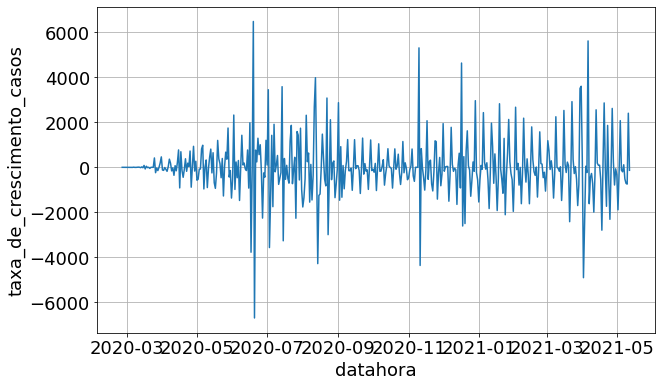

In [ ]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data= dados_sp)
plt.grid()

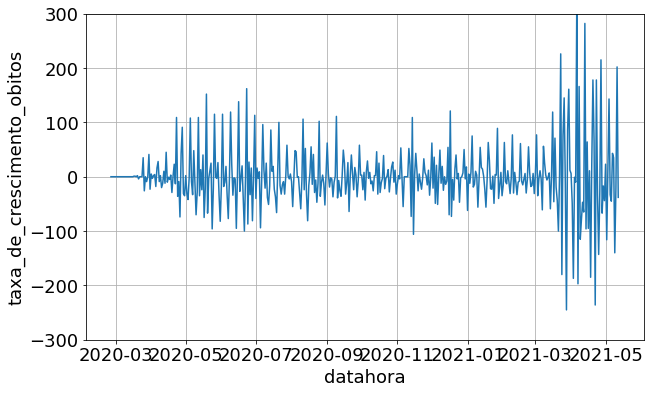

In [ ]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data= dados_sp)
plt.ylim(-300,300)
plt.grid()

No gráfico relativo aos casos, apenas em 4 pontos a casa dos 4000 casos foi ultrapassada. Esses picos mais evidentes não estão presentes no gráfico de óbitos pois os casos da doença não são comumente reportados nos fins de semana e feriados, por exemplo, causando um aumento repentino nas segundas feiras e pós-feriados.

No mais, o formato geral de ambos os gráficos é bem semelhante, respeitando, é claro, a escala de cada um deles, que é bem diferente devido ao fato de o número de casos ser significativamente maior do que o número de óbitos.

###**Desafio 4:**

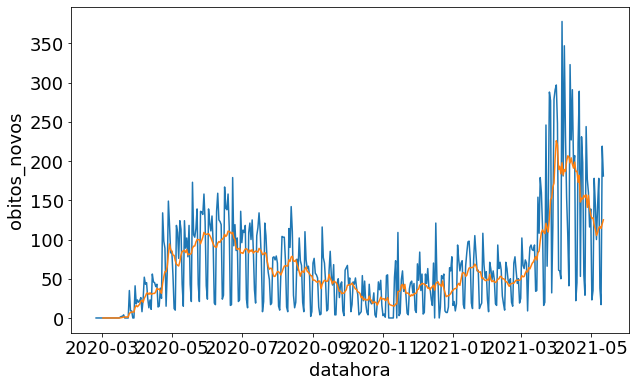

In [ ]:
sns.lineplot(x='datahora', y='obitos_novos', data= dados_sp)
sns.lineplot(x='datahora', y='media_movel_obitos', data= dados_sp)

# **Aula 01 - parte 3**

In [ ]:
# Vamos explorar a partir de agora a sazonalidade.
# Para isso vamos estudar e calcular Correlação.

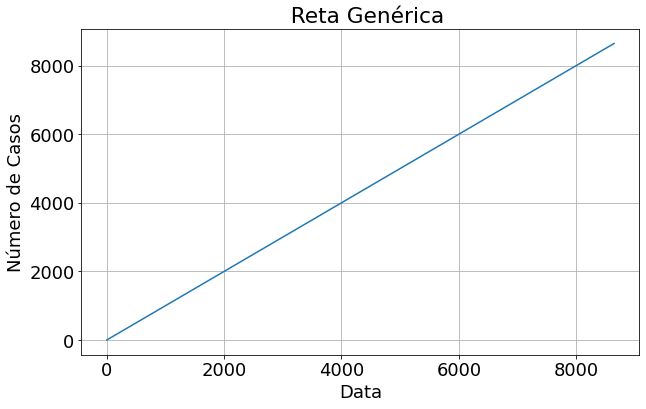

In [ ]:
plt.figure(figsize=(10,6))
plt.title('  Reta Genérica')
plt.grid()
plt.xlabel('Data')
plt.ylabel('Número de Casos')

# Vamos plotar um gráfico que correlaciona Casos Novos com Casos Novos para visualizar uma Correlação Perfeita.
sns.lineplot(x='casos_novos', y='casos_novos', data= dados_sp)

# Evidentemente a correlação entre uma mesma variável é uma linha reta pois são dois gráficos identicos em cada ponto.

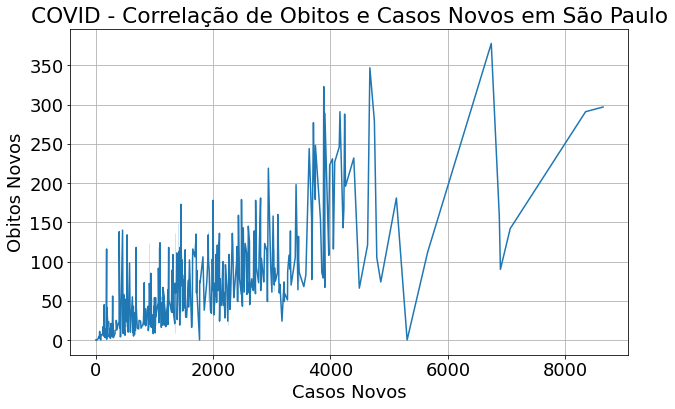

In [ ]:
plt.figure(figsize=(10,6))
plt.title('COVID - Correlação de Obitos e Casos Novos em São Paulo')
plt.grid()
plt.xlabel('Casos Novos')
plt.ylabel('Obitos Novos')

# Entendendo essa lógica, agora podemos começar a visualizar e entender uma correlação entre variáveis distintas.
sns.lineplot(x='casos_novos', y='obitos_novos', data= dados_sp)

In [ ]:
# Criando dois datasets, janeiro e fevereiro de 2021, para analisar mes a mes e verificar a sazonalidade dos dados.
dados_202101 = dados_sp.query('mes==1 & ano==2021')
dados_202102 = dados_sp.query('mes==2 & ano==2021')

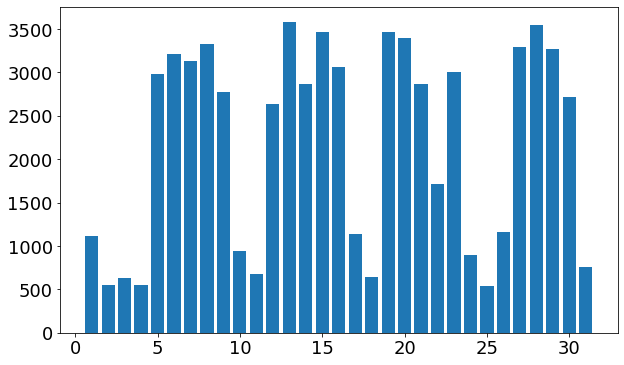

<BarContainer object of 28 artists>

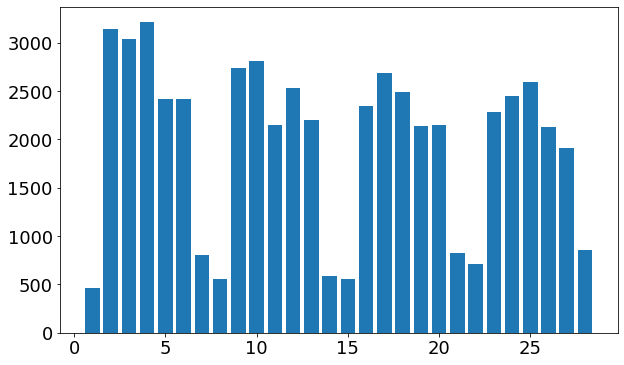

In [ ]:
# Plotando os gráficos dos dois meses.
plt.bar(np.linspace(1,31,31), dados_202101['casos_novos'])
plt.show()
plt.bar(np.linspace(1,28,28), dados_202102['casos_novos'])

In [ ]:
# É bastante clara a sazonalidade nesses dois gráficos.
# Mas nem sempre ela é tão evidente.
# Para verificar a sazonalidade em séries temporais, existe a Função de Auto Correlação.

In [ ]:
from pandas.plotting import autocorrelation_plot

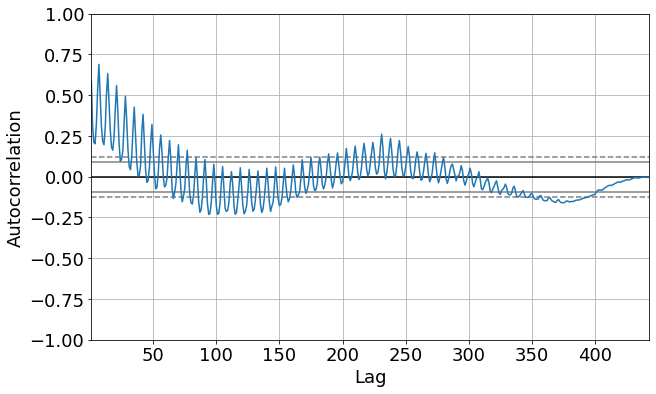

In [ ]:
autocorrelation_plot(dados_sp['casos_novos'])

**O que aprendemos:**

Aprendemos o que é uma série temporal;

Calculamos a taxa de crescimento de um evento em uma série temporal;

Aprendemos o que é uma média móvel;

Entendemos o que é correlação e função de autocorrelação.

## **Desafios:**

**Desafio 5:** Mover o número de óbitos alguns dias para verificar o resultado no gráfico.

**Desafio 6:** Função de correlação cruzada dos óbitos e casos.

**Desafio 7:** Estudar outros municípios.

###**Desafio 5:**

Documentação do [**Shift**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html).

In [ ]:
dados_sp['obitos -7'] = dados_sp['obitos_novos'].shift(-7)
dados_sp['obitos -14'] = dados_sp['obitos_novos'].shift(-14)
dados_sp['obitos -21'] = dados_sp['obitos_novos'].shift(-21)
dados_sp['obitos -28'] = dados_sp['obitos_novos'].shift(-28)

Text(0.5, 1.0, 'Correlação Original')

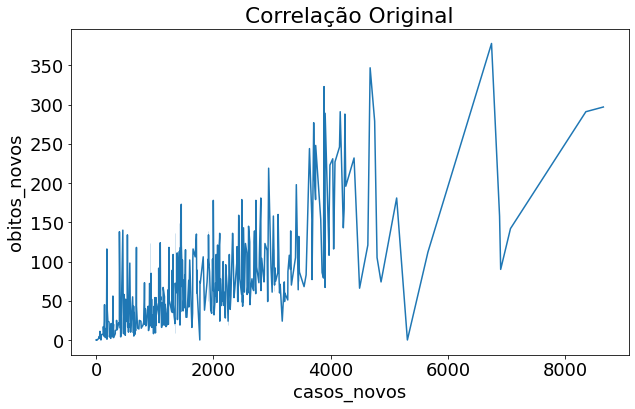

In [ ]:
sns.lineplot(x='casos_novos', y='obitos_novos', data= dados_sp)
plt.title('Correlação Original')

Text(0.5, 1.0, 'Correlação de -7 dias')

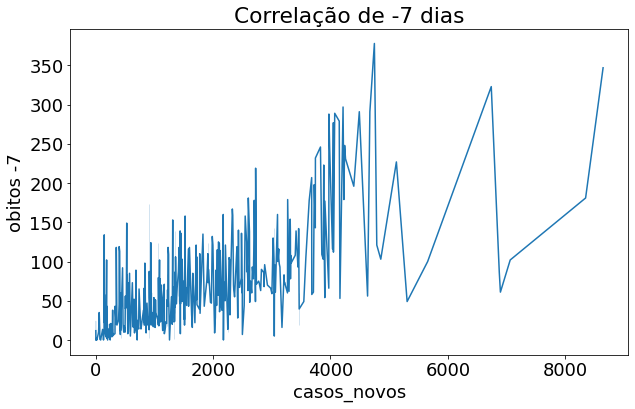

In [ ]:
sns.lineplot(x='casos_novos', y='obitos -7', data= dados_sp)
plt.title('Correlação de -7 dias')

Text(0.5, 1.0, 'Correlação de -14 dias')

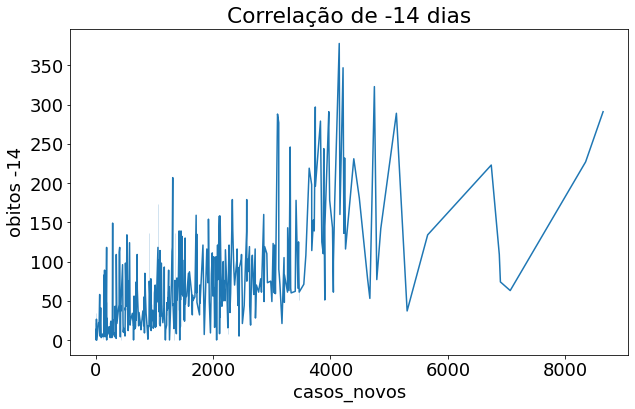

In [ ]:
sns.lineplot(x='casos_novos', y='obitos -14', data= dados_sp)
plt.title('Correlação de -14 dias')

Text(0.5, 1.0, 'Correlação de -21 dias')

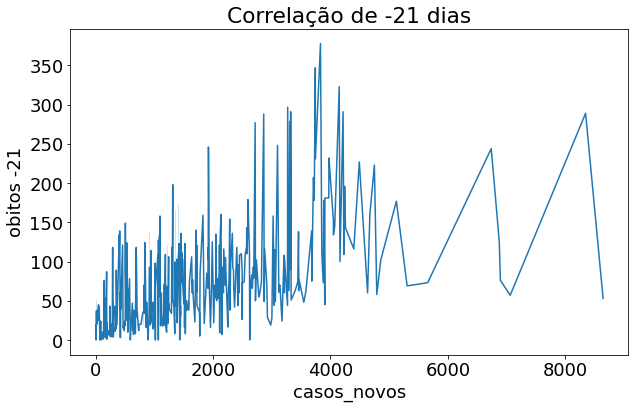

In [ ]:
sns.lineplot(x='casos_novos', y='obitos -21', data= dados_sp)
plt.title('Correlação de -21 dias')

Text(0.5, 1.0, 'Correlação de -28 dias')

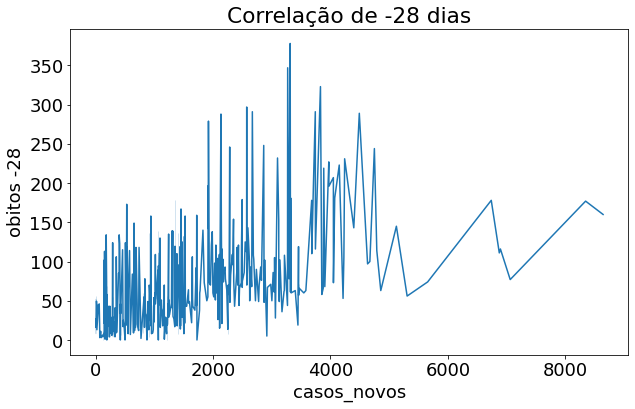

In [ ]:
sns.lineplot(x='casos_novos', y='obitos -28', data= dados_sp)
plt.title('Correlação de -28 dias')

###**Desafio 6:**

[ ... ] **correlação cruzada** é uma medida de similaridade entre dois sinais em função de um atraso aplicado a um deles. Também é conhecida como produto interno deslizante.

Fonte: [Wikipedia](https://pt.wikipedia.org/wiki/Rela%C3%A7%C3%A3o_cruzada)

###**Desafio 7:**

# **Aula 02**

A partir de agora vamos começar a trabalhar com previsões de séries temporáis.

E para isso vamos usar a biblioteca Facebook Prophet, criado pelo [Facebook Research](https://research.fb.com/category/data-science/).

[Quick Start](https://facebook.github.io/prophet/docs/quick_start.html) do Prophet.

In [ ]:
dados_sp['datahora']

562      2020-02-25
1207     2020-02-26
1852     2020-02-27
2497     2020-02-28
3142     2020-02-29
            ...    
283072   2021-05-08
283717   2021-05-09
284362   2021-05-10
285007   2021-05-11
285652   2021-05-12
Name: datahora, Length: 443, dtype: datetime64[ns]

In [ ]:
# Importando a biblioteca.
from fbprophet import Prophet

# Criando um dataframe nos moldes necessários para aplicar os recursos da biblioteca.
df = pd.DataFrame()
df['ds'] = dados_sp['datahora'][:400]
df['y'] = dados_sp['casos_novos'][:400]

# É necessário no dataframe uma coluna chamada 'ds' para os dados temporáis e uma coluna 'y' para a variável a ser estudada.
# Nesse caso vamos usar os dados da cidade de São Paulo e estudar o número de casos novos.
# Importante pontuar também que está sendo utilizado os primeiros 400 dias para que possamos testar o modelo com os outros 43 dias restantes, ou seja, vamossubrimir do dataset os ultimos 43 dias de caso e depois testar o modelo criado para ver se o que o modelo vai prever para esse modelo realmente condiz com a realidade.

In [ ]:
dados_sp.shape

(443, 35)

In [ ]:
# Visualizando o dataset resultante.
df.head()

ds  y
562  2020-02-25  0
1207 2020-02-26  0
1852 2020-02-27  0
2497 2020-02-28  1
3142 2020-02-29  0

In [ ]:
df.tail()

ds     y
255337 2021-03-26  4241
255982 2021-03-27  3709
256627 2021-03-28  2010
257272 2021-03-29  1242
257917 2021-03-30  4748

"We fit the model by **instantiating a new Prophet object** (modelo = Prophet()). Any settings to the forecasting procedure are passed into the constructor. Then you **call its fit method** and **pass in the historical dataframe** (modelo.fit(df))."

---

"Ajustamos o modelo instanciando um novo objeto do Prophet. [ ... ] Então, chamamos o método fit e passamos a série histórica."



In [ ]:
modelo = Prophet()

# Ajustando o modelo a nossos dados históricos.
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Modelo é a linha azul no gráfico.**

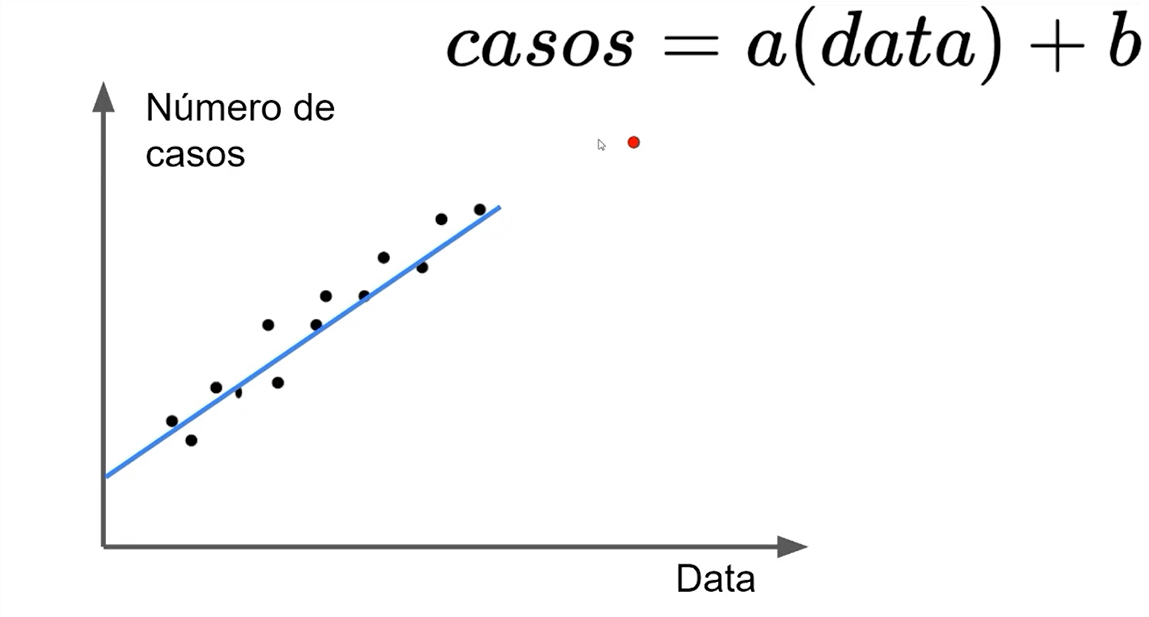

In [ ]:
modelo

"You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. By default it will also include the dates from the history, so we will see the model fit as well."

---

"Podemos obter um dataframe adequado que se estende até o futuro por um determinado número de dias usando o método auxiliar *Prophet.make_future_dataframe*. Por padrão, ele também incluirá os dados históricos e vai se adequar a eles."

In [ ]:
# Aqui fazemos o que foi proposto no início. Esse novo dataframe tem tanto o período histórico (primeiros 400 dias) quanto o período a ser previsto (43 dias a mais).
# Lembrando que esses 43 dias a mais que serão previstos nos temos em 'dados_sp['datahora'], mas não estamos utilizando agora justamente para testar o modelo.
dataframefuturo = modelo.make_future_dataframe(periods=43)
dataframefuturo.head()

ds
0 2020-02-25
1 2020-02-26
2 2020-02-27
3 2020-02-28
4 2020-02-29

In [ ]:
dataframefuturo.tail()
# Lembrando que, até aqui, sem previsões.

ds
438 2021-05-08
439 2021-05-09
440 2021-05-10
441 2021-05-11
442 2021-05-12

"The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals."

---

"O método predict irá atribuir a cada coluna futura um valor previsto chamado yhat. Se passarmos os dados históricos o modelo irá fornecer uma amostra ajustada. O objeto de previsão aqui é um novo dataframe que inclui uma coluna yhat com a previsão, bem como colunas para componentes e intervalos de incerteza."

In [ ]:
# Crio então a previsão através do modelo, passando todo o período (443 dias). Obs.: Irá prever de fato os 43 últimos.
previsao = modelo.predict(dataframefuturo)
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds        yhat   yhat_lower   yhat_upper
0 2020-02-25  320.078004  -801.120285  1440.863534
1 2020-02-26  337.016324  -661.789740  1381.521752
2 2020-02-27  494.014021  -539.796887  1621.176600
3 2020-02-28  256.493471  -912.284272  1324.804480
4 2020-02-29   -7.395631 -1112.109584  1079.012752

In [ ]:
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
438 2021-05-08  3256.552192  2128.734861  4369.987235
439 2021-05-09  2340.282141  1229.538304  3365.384111
440 2021-05-10  2177.135384  1167.408694  3298.509765
441 2021-05-11  3688.215105  2672.573191  4729.807821
442 2021-05-12  3698.401813  2611.511749  4740.944788

In [ ]:
# Criamos então um dataframe com apenas os últimos 43 dias dos dados que temos no 'dados_sp['datahora']' para plotar no gráfico e verificar se o modelo preditivo se adequou aos dados.
df_teste = pd.DataFrame()
df_teste['ds'] =  dados_sp['datahora'][400:]
df_teste['y'] =  dados_sp['casos_novos'][400:]

In [ ]:
df_teste

ds     y
258562 2021-03-31  8348
259207 2021-04-01  8646
259852 2021-04-02  3743
260497 2021-04-03  1311
261142 2021-04-04  1359
261787 2021-04-05  1126
262432 2021-04-06  6740
263077 2021-04-07  5123
263722 2021-04-08  4671
264367 2021-04-09  4397
265012 2021-04-10  3679
265657 2021-04-11  1689
266302 2021-04-12  1331
266947 2021-04-13  3885
267592 2021-04-14  4072
268237 2021-04-15  4161
268882 2021-04-16  4256
269527 2021-04-17  3723
270172 2021-04-18   930
270817 2021-04-19  1126
271462 2021-04-20  3986
272107 2021-04-21  3904
272752 2021-04-22  2172
273397 2021-04-23  4034
274042 2021-04-24  3413
274687 2021-04-25  1103
275332 2021-04-26  1021
275977 2021-04-27  3637
276622 2021-04-28  3888
277267 2021-04-29  3102
277912 2021-04-30  3036
278557 2021-05-01  2700
279202 2021-05-02   812
279847 2021-05-03   650
280492 2021-05-04  2724
281137 2021-05-05  2599
281782 2021-05-06  2400
282427 2021-05-07  2513
283072 2021-05-08  1998
283717 2021-05-09  1285
284362 2021-05-10   538
285007 2021-05-11  2941
285652 2021-05-12  2808

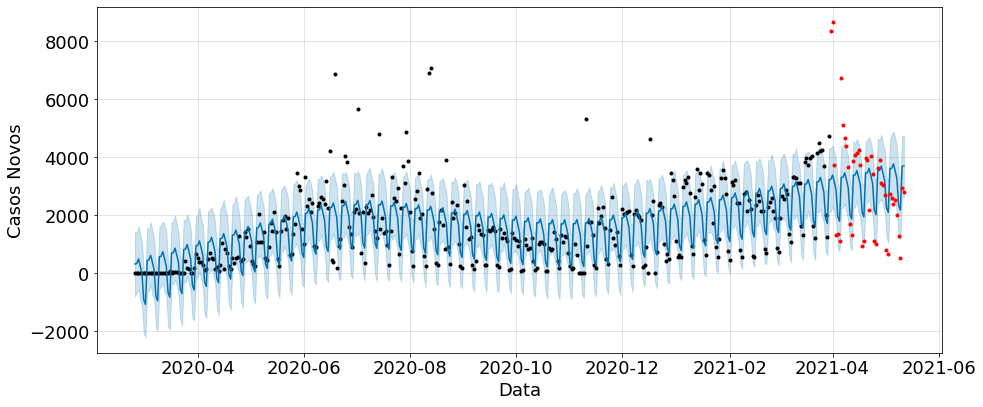

In [ ]:
# Em azul, o modelo preditivo em todo o período, inclusive no futuro que foi anteriormente suprimido ([400:]).
modelo.plot(previsao, xlabel='Data', ylabel='Casos Novos', figsize=(14,6));
# Em vermelho os dados históricos (últimos 43 dias da série histórica) para verificar se o modelo cobriu os dados reais.
plt.plot(df_teste['ds'], df_teste['y'], '.r')

Assim, temos um gráfico que mostra os casos registrados em pontos pretos, a tendencia e previsão dos dados em azul e os dados reais de teste em vermelho.

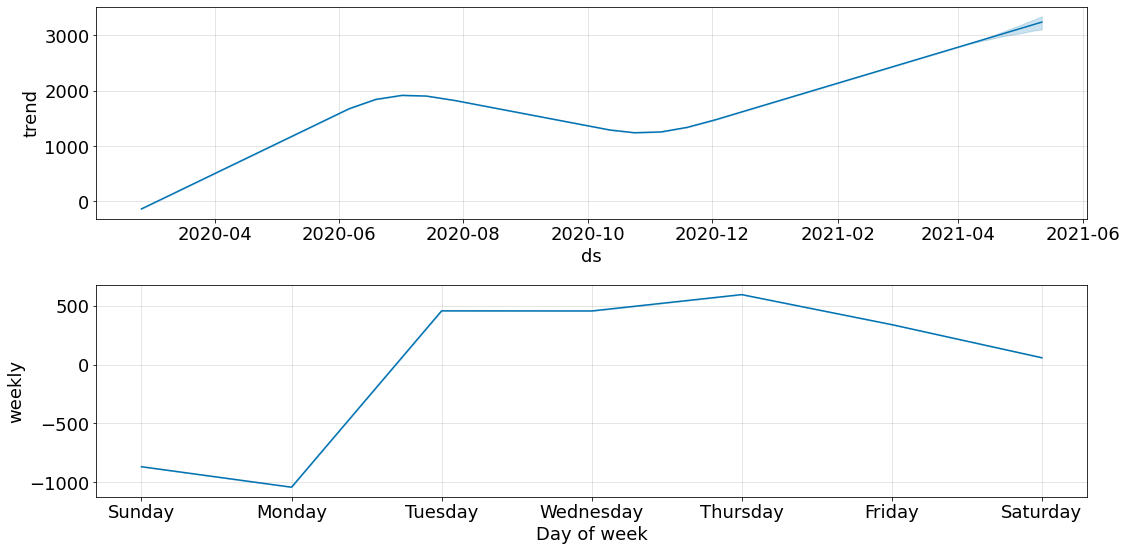

In [ ]:
# Plotando as informações (componentes) que o Prophet está enxergando.
modelo.plot_components(previsao, figsize=(16,8));

O primeiro gráfico mostra a tendencia geral dos dados. Muito semelhante à linha azul plotada no gráfico anterior.

O segundo gráfico mostra a sazonalidade semanal dos dados.

O próximo passo, que será dados nas aulas seguintes, será melhorar o modelo para se adequar melhor aos dados reais.

**O que aprendemos**

Vimos as primeiras previsões com o PROPHET;

Fizemos a decomposição de séries temporais.

## **Desafios:**

**Desafio 08:** Mudar os períodos de previsão.

**Desafio 09:** Explorar a documentação do Prophet e melhorar os gráficos.

**Desafio 10:** Fazer todo o processo de previsão para o número de casos acumulados.

# **Aula 03**

A partir de agora vamos ajustar alguns parâmetros para ajustar melhor a linha de tendência e as previsões para os dados históricos que temos.

In [ ]:
# Importando uma configuração de gráfico que mostra pontos de mudança (linhas pontilhadas) na tendencia do gráfico.
from fbprophet.plot import add_changepoints_to_plot

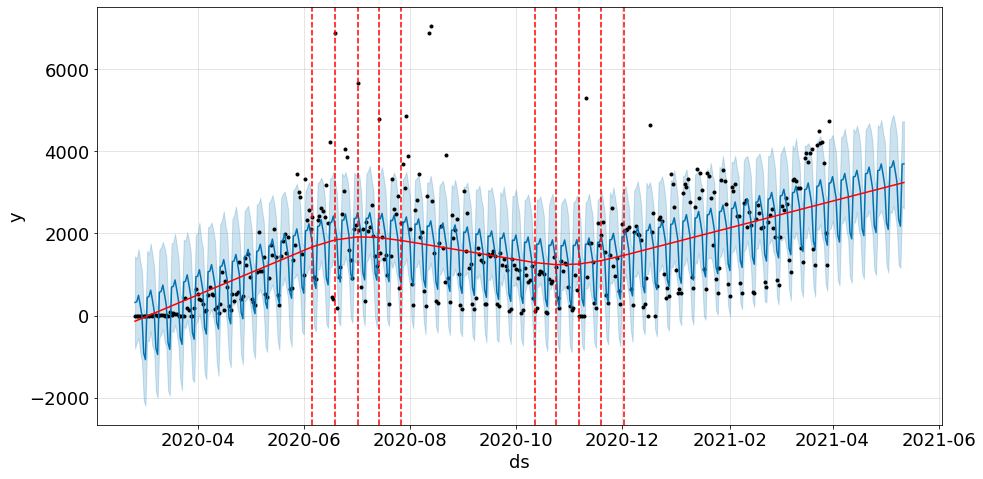

In [ ]:
# Plotando o gráfico já com as finhas de tendência.
fig = modelo.plot(previsao, figsize=(14,7))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

### Agora vamos colocar mais **change points** no gráfico.

In [ ]:
# Recriando o modelo com o novo parâmetro.
modelo = Prophet(n_changepoints=50)
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=43)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


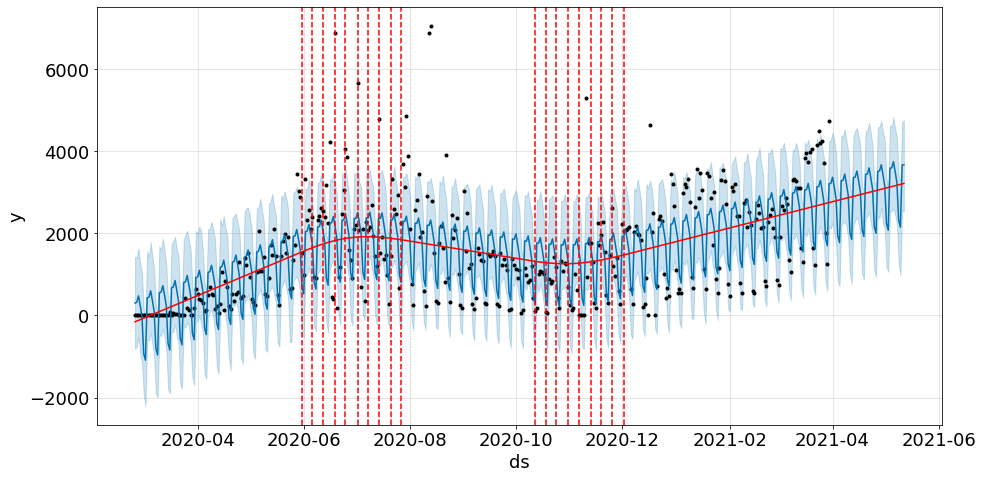

In [ ]:
# Plotando o novo gráfico.
fig = modelo.plot(previsao, figsize=(14,7))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

# Aparentemente o maior número de change points não mudou a tendência geral do gráfico.

### Vamos trabalhar agora com o espaçamento entre esses **change points**.

In [ ]:
# Recriando o modelo com o novo parâmetro.
modelo = Prophet(n_changepoints=50, changepoint_prior_scale=10.0)
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=43)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


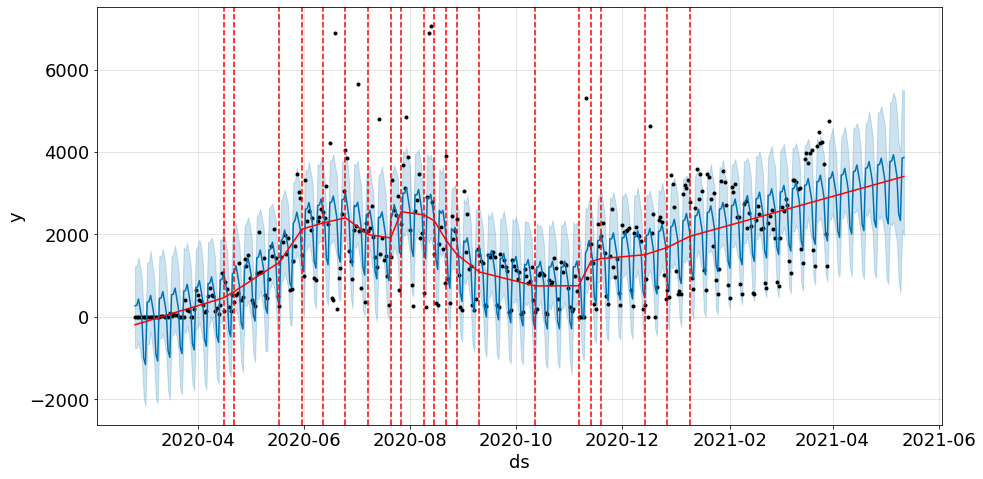

In [ ]:
# Plotando o novo gráfico.
fig = modelo.plot(previsao, figsize=(14,7))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

### Agora vamos adicionar **change points** em datas especificas.

In [ ]:
# Recriando o modelo com o novo parâmetro.
modelo = Prophet(changepoints=['2020-12-31'])
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=43)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


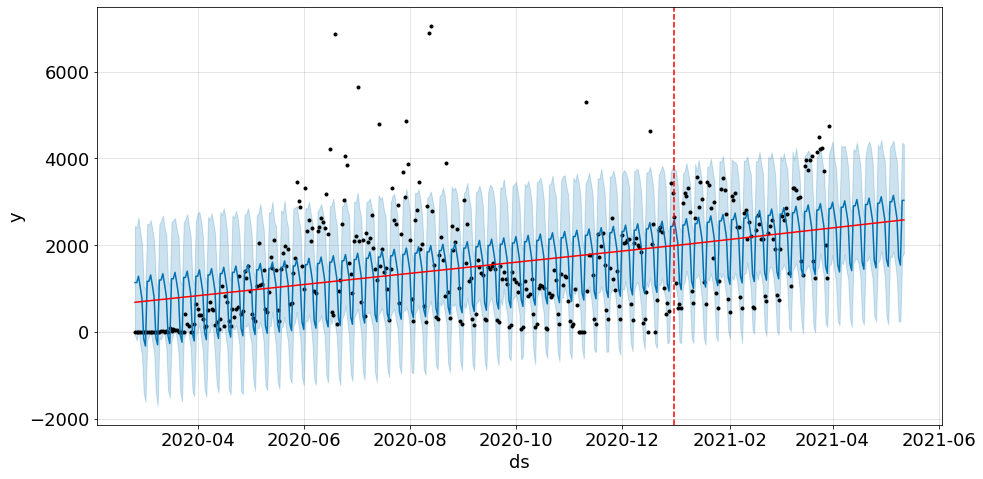

In [ ]:
# Plotando o novo gráfico.
fig = modelo.plot(previsao, figsize=(14,7))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

**O que aprendemos:**

Curva com o crescimento logístico;

Mudança de tendência em uma série temporal;

Como decidir se houve mudança de tendência através de um gráfico de barras.

## **Desafios:**

**Desafio 11:** Identificar potenciais changepoints.

**Desafio 12:** Desenvolver uma função roda o modelo automaticamente.

# **Aula 04**

Vamos passar a observar mudanças no gráfico devido a feriados e sazonalidades.

In [ ]:
# modelo.add_country_holidays(country_name='BR')

In [ ]:
# Vamos inicialmente utilizar o 'changepoint_prior_scale' igual a 10, pois foi o que melhor se adequou aos dados.
modelo = Prophet(changepoint_prior_scale=10.0)
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=43)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


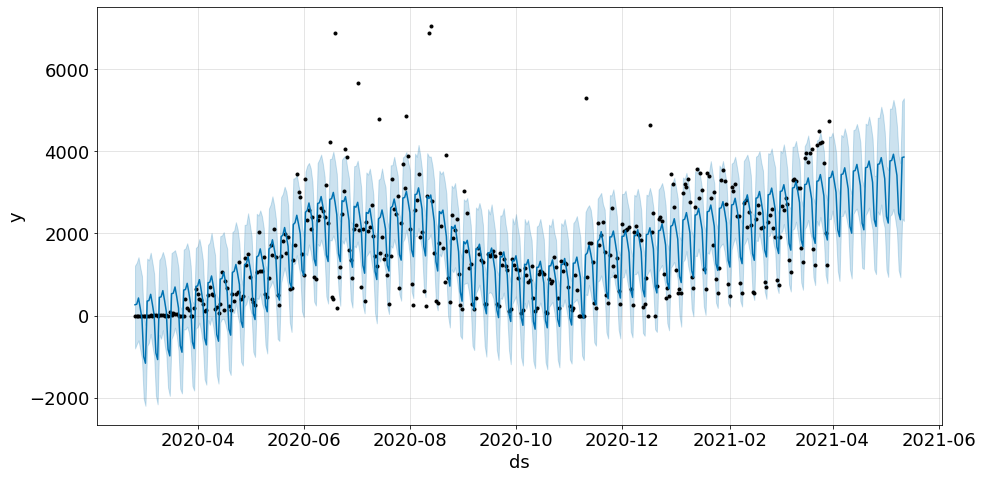

In [ ]:
# Visualizando o gráfico.
fig = modelo.plot(previsao, figsize=(14,7))

In [ ]:
feriados_sp_2020= [
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-04-21',
'2020-05-01',
'2020-05-20',
'2020-05-21',
'2020-05-22',
'2020-05-25',
'2020-06-11',
'2020-09-07',
'2020-10-12',
'2020-11-02',
'2020-11-15',
'2020-12-25'
]

feriados_sp_2021= [
'2020-01-01',
'2020-01-25',
'2020-02-15',
'2020-02-16',
'2020-02-17',
'2020-03-26',
'2020-03-29',
'2020-03-30',
'2020-03-31',
'2020-04-01',
'2020-04-02',
'2020-4-21',
'2020-05-01'
]

In [ ]:
feriados_sp_2020 = pd.DataFrame({'holiday':'sp_2020', 'ds': pd.to_datetime(feriados_sp_2020)})
feriados_sp_2020

holiday         ds
0   sp_2020 2020-02-25
1   sp_2020 2020-02-26
2   sp_2020 2020-04-10
3   sp_2020 2020-04-21
4   sp_2020 2020-05-01
5   sp_2020 2020-05-20
6   sp_2020 2020-05-21
7   sp_2020 2020-05-22
8   sp_2020 2020-05-25
9   sp_2020 2020-06-11
10  sp_2020 2020-09-07
11  sp_2020 2020-10-12
12  sp_2020 2020-11-02
13  sp_2020 2020-11-15
14  sp_2020 2020-12-25

In [ ]:
feriados_sp_2021 = pd.DataFrame({'holiday':'sp_2021', 'ds': pd.to_datetime(feriados_sp_2021)})
feriados_sp_2021

holiday         ds
0   sp_2021 2020-01-01
1   sp_2021 2020-01-25
2   sp_2021 2020-02-15
3   sp_2021 2020-02-16
4   sp_2021 2020-02-17
5   sp_2021 2020-03-26
6   sp_2021 2020-03-29
7   sp_2021 2020-03-30
8   sp_2021 2020-03-31
9   sp_2021 2020-04-01
10  sp_2021 2020-04-02
11  sp_2021 2020-04-21
12  sp_2021 2020-05-01

In [ ]:
feriados = pd.concat((feriados_sp_2020, feriados_sp_2021))
feriados

holiday         ds
0   sp_2020 2020-02-25
1   sp_2020 2020-02-26
2   sp_2020 2020-04-10
3   sp_2020 2020-04-21
4   sp_2020 2020-05-01
5   sp_2020 2020-05-20
6   sp_2020 2020-05-21
7   sp_2020 2020-05-22
8   sp_2020 2020-05-25
9   sp_2020 2020-06-11
10  sp_2020 2020-09-07
11  sp_2020 2020-10-12
12  sp_2020 2020-11-02
13  sp_2020 2020-11-15
14  sp_2020 2020-12-25
0   sp_2021 2020-01-01
1   sp_2021 2020-01-25
2   sp_2021 2020-02-15
3   sp_2021 2020-02-16
4   sp_2021 2020-02-17
5   sp_2021 2020-03-26
6   sp_2021 2020-03-29
7   sp_2021 2020-03-30
8   sp_2021 2020-03-31
9   sp_2021 2020-04-01
10  sp_2021 2020-04-02
11  sp_2021 2020-04-21
12  sp_2021 2020-05-01

In [ ]:
modelo_feriados = Prophet(changepoint_prior_scale=10.0, holidays= feriados)
modelo_feriados.fit(df)
dataframefuturo = modelo_feriados.make_future_dataframe(periods=43)
previsao = modelo_feriados.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


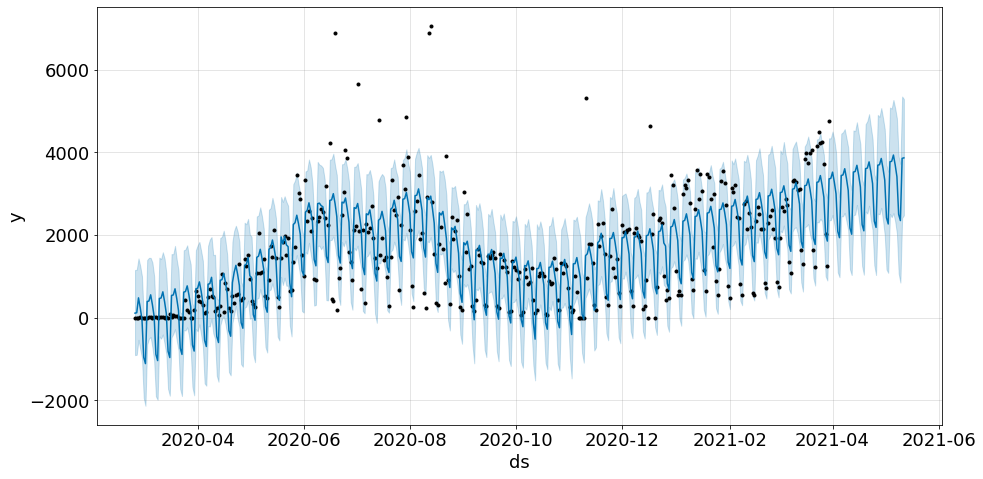

In [ ]:
modelo_feriados.plot(previsao, figsize=(14,7));

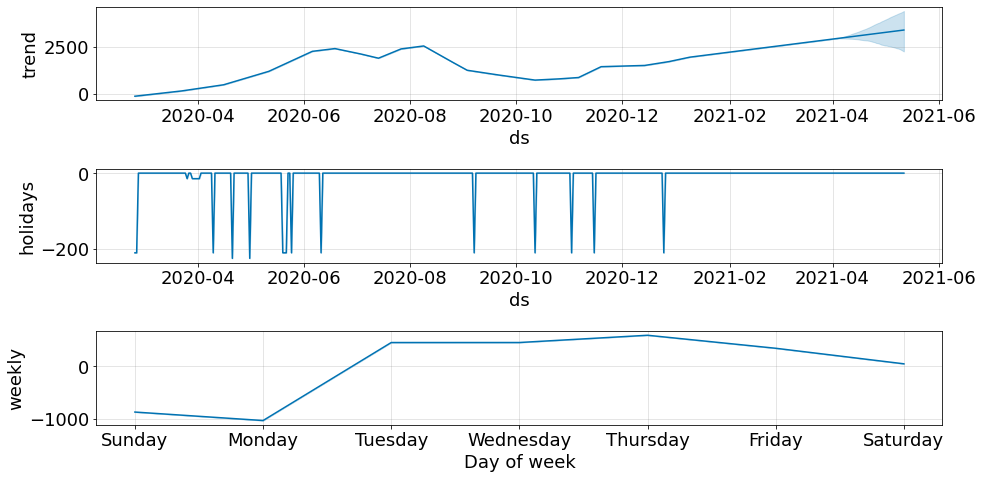

In [ ]:
modelo_feriados.plot_components(previsao, figsize=(14,7));

In [ ]:
# Vamos então buscar uma forma objetiva de media a eficiencia dos tipos de sazonalidade aplicados aos dados.
from sklearn.metrics import mean_absolute_error

In [ ]:
# Sazonalidade Aditiva
mean_absolute_error(df['y'], previsao['yhat'][:400])

538.0474179988163

In [ ]:
# Sazonalidade Multiplicativa
modelo_feriados = Prophet(changepoint_prior_scale=10.0, holidays= feriados, seasonality_mode='multiplicative')
modelo_feriados.fit(df)
dataframefuturo = modelo_feriados.make_future_dataframe(periods=43)
previsao = modelo_feriados.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
mean_absolute_error(df['y'], previsao['yhat'][:400])

452.2884903942229

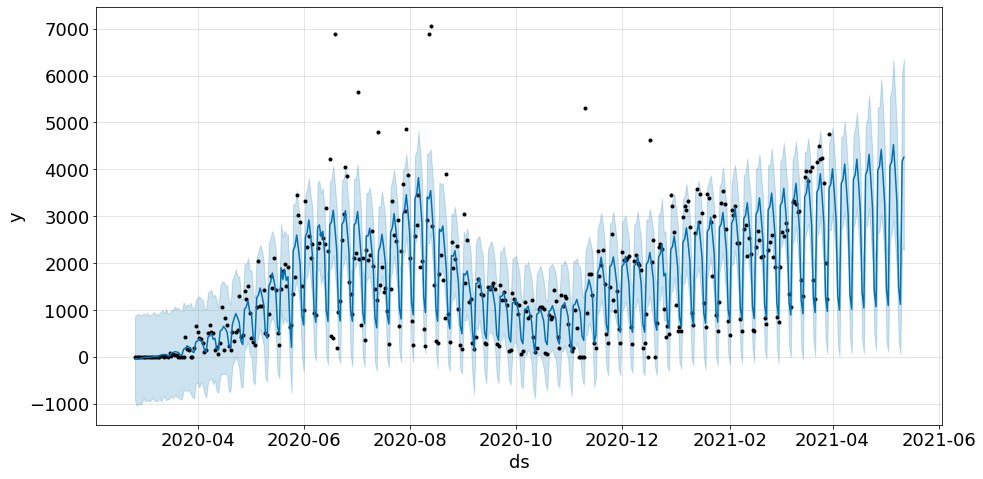

In [ ]:
modelo_feriados.plot(previsao, figsize=(14,7));

**O que aprendemos:**

Efeito da sazonalidade e feriados em uma série temporal;

Sazonalidade aditiva e sazonalidade multiplicativa;

Previsões considerando sazonalidade e feriados com o PROPHET.

**Desafio Extra:** Utilizar outras métricas do Scikitlearn e comparar os resultados.

# **Aula 05 - Parte 1**

Vamos tratar agora os outliers dos dados.


In [ ]:
# Criando uma variável a partir do df sem o index.
novo_y = df.reset_index()
novo_y

index         ds     y
0       562 2020-02-25     0
1      1207 2020-02-26     0
2      1852 2020-02-27     0
3      2497 2020-02-28     1
4      3142 2020-02-29     0
..      ...        ...   ...
395  255337 2021-03-26  4241
396  255982 2021-03-27  3709
397  256627 2021-03-28  2010
398  257272 2021-03-29  1242
399  257917 2021-03-30  4748

[400 rows x 3 columns]

In [ ]:
# Buscando os valores desconsiderando os outliers.
sem_outliers = novo_y[(novo_y['y']>previsao['yhat_lower'][:400]) & (novo_y['y'] < previsao['yhat_upper'][:400])]
sem_outliers

index         ds     y
0       562 2020-02-25     0
1      1207 2020-02-26     0
2      1852 2020-02-27     0
3      2497 2020-02-28     1
4      3142 2020-02-29     0
..      ...        ...   ...
394  254692 2021-03-25  4214
395  255337 2021-03-26  4241
396  255982 2021-03-27  3709
397  256627 2021-03-28  2010
398  257272 2021-03-29  1242

[355 rows x 3 columns]

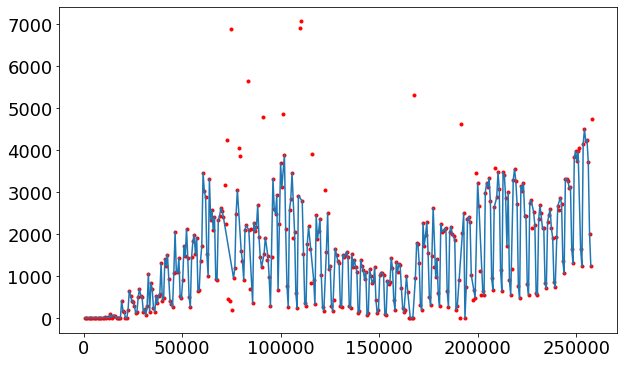

In [ ]:
# Plotando os dados sem os outliers (em azul).
plt.plot(df.index, df['y'],'r.')
plt.plot(sem_outliers['index'], sem_outliers['y'])

In [ ]:
# Criando então um data frame sem outliers (novos dados de teste).
df_sem_outliers = sem_outliers[['ds','y']]
df_sem_outliers

ds     y
0   2020-02-25     0
1   2020-02-26     0
2   2020-02-27     0
3   2020-02-28     1
4   2020-02-29     0
..         ...   ...
394 2021-03-25  4214
395 2021-03-26  4241
396 2021-03-27  3709
397 2021-03-28  2010
398 2021-03-29  1242

[355 rows x 2 columns]

In [ ]:
# Criando novamente o modelo mais agora com os dados sem os outliers.
modelo_feriados = Prophet(changepoint_prior_scale=10.0, holidays= feriados, seasonality_mode='multiplicative')
modelo_feriados.fit(df_sem_outliers)
dataframefuturo = modelo_feriados.make_future_dataframe(periods=43)
previsao = modelo_feriados.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


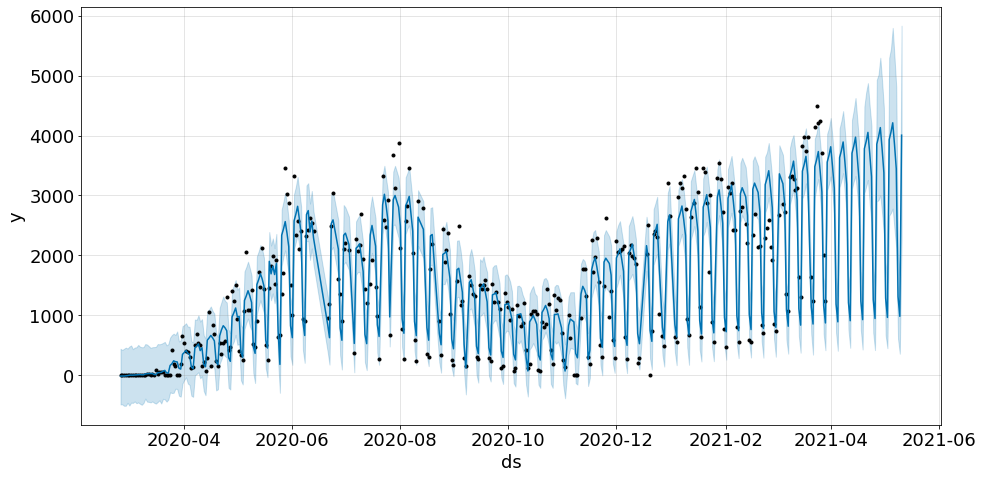

In [ ]:
# Plotando o modelo.
modelo_feriados.plot(previsao, figsize=(14,7));

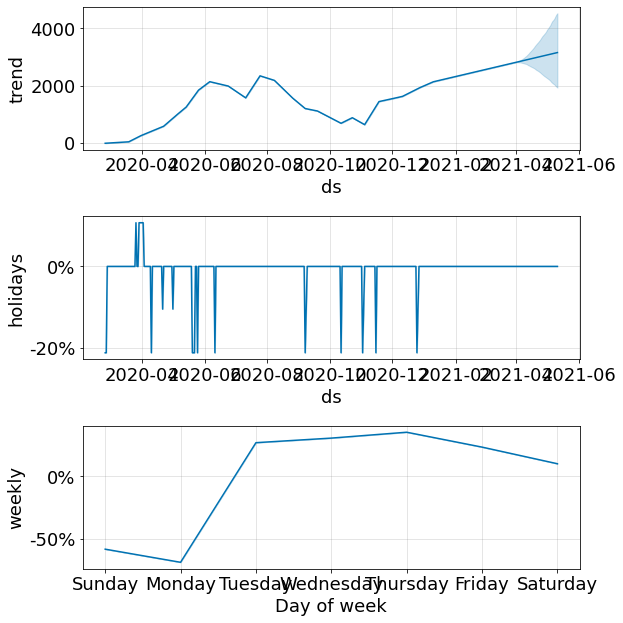

In [ ]:
# Plotando os componentes individuais do gráfico.
modelo_feriados.plot_components(previsao);

In [ ]:
amostras = modelo_feriados.predictive_samples(previsao)

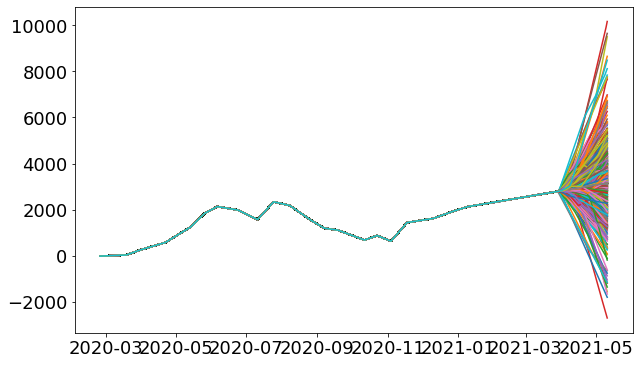

In [ ]:
plt.plot(previsao['ds'], amostras['trend']);

# **Aula 05 - Parte 2**

A partir de agora vamos validar os dados através do método de Validação Cruzada.

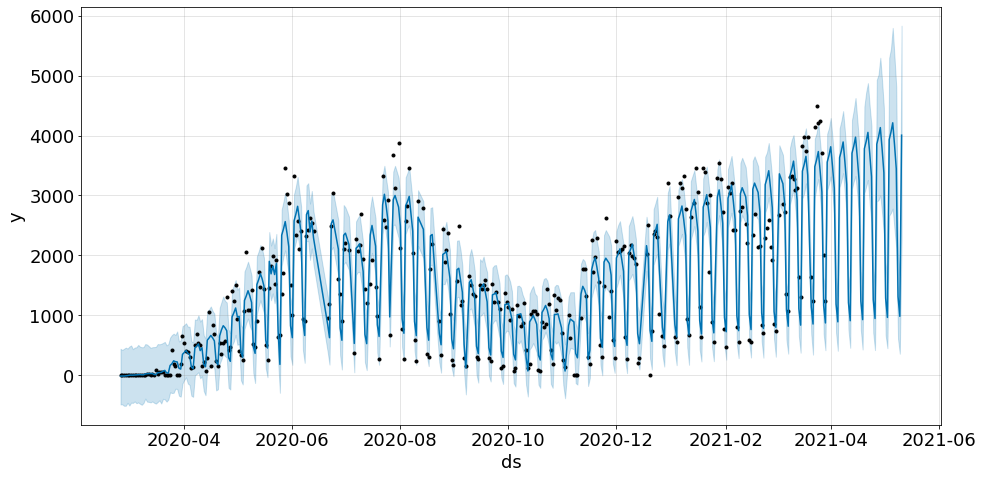

In [ ]:
# Visualizando novamente o gráfico resultante da aula anterior. Vamos partir daqui.
modelo_feriados.plot(previsao, figsize=(14,7));

In [ ]:
# Importando o método de Validação Cuzada do Prophet.
from fbprophet.diagnostics import cross_validation

In [ ]:
df_cv = cross_validation(modelo_feriados, initial='180 days', period='30 days', horizon='30 days')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2020-08-31 00:00:00 and 2021-02-27 00:00:00


In [ ]:
janela = 1

In [ ]:
cutoff = df_cv['cutoff'].unique()[janela]

In [ ]:
df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]

Text(0.5, 0, 'ds')

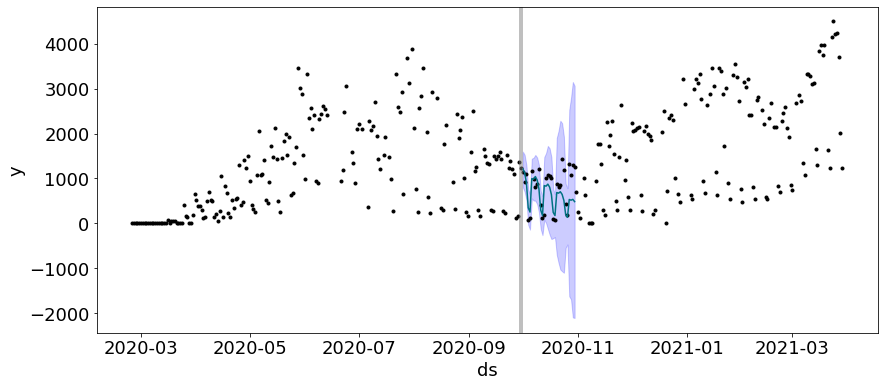

In [ ]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)
ax.plot(modelo_feriados.history['ds'].values, modelo_feriados.history['y'], 'k.')
ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#007282')
ax.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'], df_cv_cut['yhat_upper'], color='blue', alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

# Os pontos pretos são os dados históricos, que usamos para treinar os modelos.
# Utilizou-se todos os pontos anteriores a linha vertixal cinza para treinar o modelo.

In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:
df_p = performance_metrics(df_cv)

INFO:fbprophet:Skipping MAPE because y close to 0


In [ ]:
df_p

horizon            mse        rmse         mae     mdape  coverage
0   4 days  101058.282185  317.896653  245.599428  0.214932  0.824561
1   5 days   89865.239973  299.775316  241.079279  0.214932  0.872180
2   6 days  105636.757020  325.018087  267.946218  0.201598  0.884211
3   7 days   79282.996421  281.572364  238.101330  0.135509  0.947368
4   8 days  177901.550705  421.783772  348.675851  0.181643  0.736842
5   9 days  174512.099030  417.746453  342.989541  0.181643  0.736842
6  10 days  191466.219281  437.568531  377.321811  0.243742  0.666667
7  11 days  129861.483412  360.362988  317.414243  0.186725  0.849624
8  12 days  122683.191919  350.261605  288.934560  0.186725  0.857143
9  13 days  176059.633493  419.594606  327.190866  0.140906  0.842105
10 14 days  221142.680591  470.258100  365.278428  0.210817  0.744361
11 15 days  297537.864876  545.470315  448.668401  0.376554  0.631579
12 16 days  278008.983772  527.265572  418.523526  0.262501  0.616541
13 17 days  293129.256345  541.414126  427.522831  0.262501  0.614035
14 18 days  390184.902729  624.647823  470.546782  0.262501  0.657895
15 19 days  465401.802533  682.203637  522.880970  0.262121  0.684211
16 20 days  576561.930592  759.316752  595.949221  0.292065  0.649123
17 21 days  572595.624780  756.700486  596.903267  0.308862  0.631579
18 22 days  612871.257511  782.860944  620.013707  0.330571  0.578947
19 23 days  498732.605740  706.210029  555.380728  0.485329  0.631579
20 24 days  479637.169698  692.558423  539.715853  0.330571  0.676692
21 25 days  467910.061473  684.039517  513.525252  0.316110  0.766917
22 26 days  779244.358136  882.748185  636.082215  0.278605  0.766917
23 27 days  902863.624994  950.191362  711.814012  0.343258  0.736842
24 28 days  956797.965089  978.160501  750.413777  0.348278  0.729323
25 29 days  817476.305657  904.143963  707.176820  0.524499  0.721805
26 30 days  659363.575827  812.012054  623.839581  0.524499  0.736842

In [ ]:
from fbprophet.plot import plot_cross_validation_metric

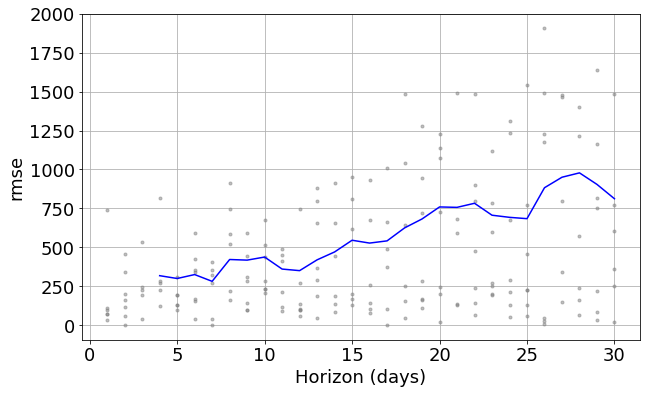

In [ ]:
plot_cross_validation_metric(df_cv, metric='rmse');

### Cross Validation

**Para saber mais: Cross Validation**

Quando vamos validar nosso modelo separamos os dados em treino, validação e teste. Os **dados de treino** são os que o modelo vai usar para se ajustar. Os **dados de validação** são os o que vamos usar para calcular a performance do modelo enquanto alterarmos variáveis como os hiperparâmetros. E por fim, depois de selecionarmos o modelo ideal usamos os **dados de teste** para calcular a métrica final do modelo.

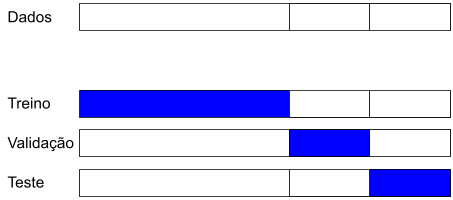

Essa etapa de separação dos dados pode nos gerar uma limitação, pois vamos validar nossos dados apenas uma vez, já que não podemos prever dados que estavam no conjunto de dados de treino.

Para resolver isso surgiu a técnica Cross Validation ou CV que cria mais possibilidades de validação do nosso modelo com a mesma quantidade de dados que tínhamos antes. Em modelos de classificação, nossos dados podem estar embaralhados e a CV, neste caso, também minimiza o efeito da aleatoriedade dos dados utilizados para treinar o modelo, tendo assim, um resultado mais próximo do real.

Agora vamos separar nossos dados apenas entre os dados de treino e validação e o CV será responsável por separar os grupos de treino e teste. O primeiro grupo será um grupo de dados inicial e faremos a previsão do horizonte seguinte que será equivalente aos de validação, o segundo grupo terá os dados iniciais mais o dados do horizonte anterior e faremos a previsão do próximo horizonte.

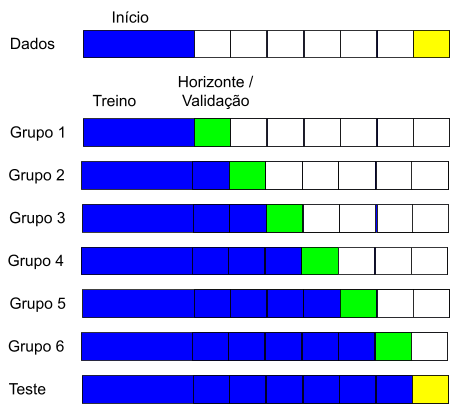

O Prothet já tem essa estratégia pronta para ser usada basta usar a função cross_validation que vai dividir os dados em diversos grupos, treinar e validar o modelo diversas vezes. O critério para essa divisão será definido através de alguns parâmetros, o primeiro é o initial, que define a porção inicial de dados que serão usados para o treinamento, outro parâmetro de atenção é o horizon que é o horizonte, que é o tamanho da previsão que será feita, o seguinte é o period que definimos de quanto em quanto tempo definimos um novo horizonte para prever.

Usando o exemplo da aula, temos o parâmetro initial como 180 dias, isso significa que o primeiro grupo será treinando com 180 dias dos dados disponíveis, o parâmetro period com 30 dias indicando as divisões dos grupos será de 30 em 30 dias, o último é o parâmetro horizon que também é de 30 dias, indica que o modelo de cada grupo fará a previsão para 30 dias.

Podemos usar o retorno do cross_validation para criar uma visualização dos grupos criados e de suas previsões.

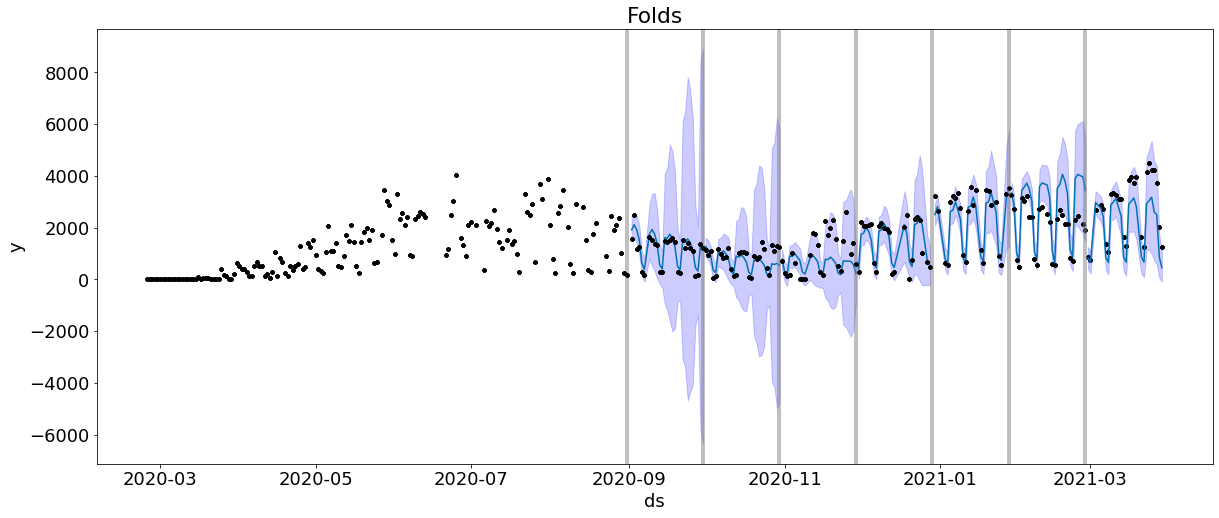

Podemos ver também um gráfico para cada grupo ou fold.

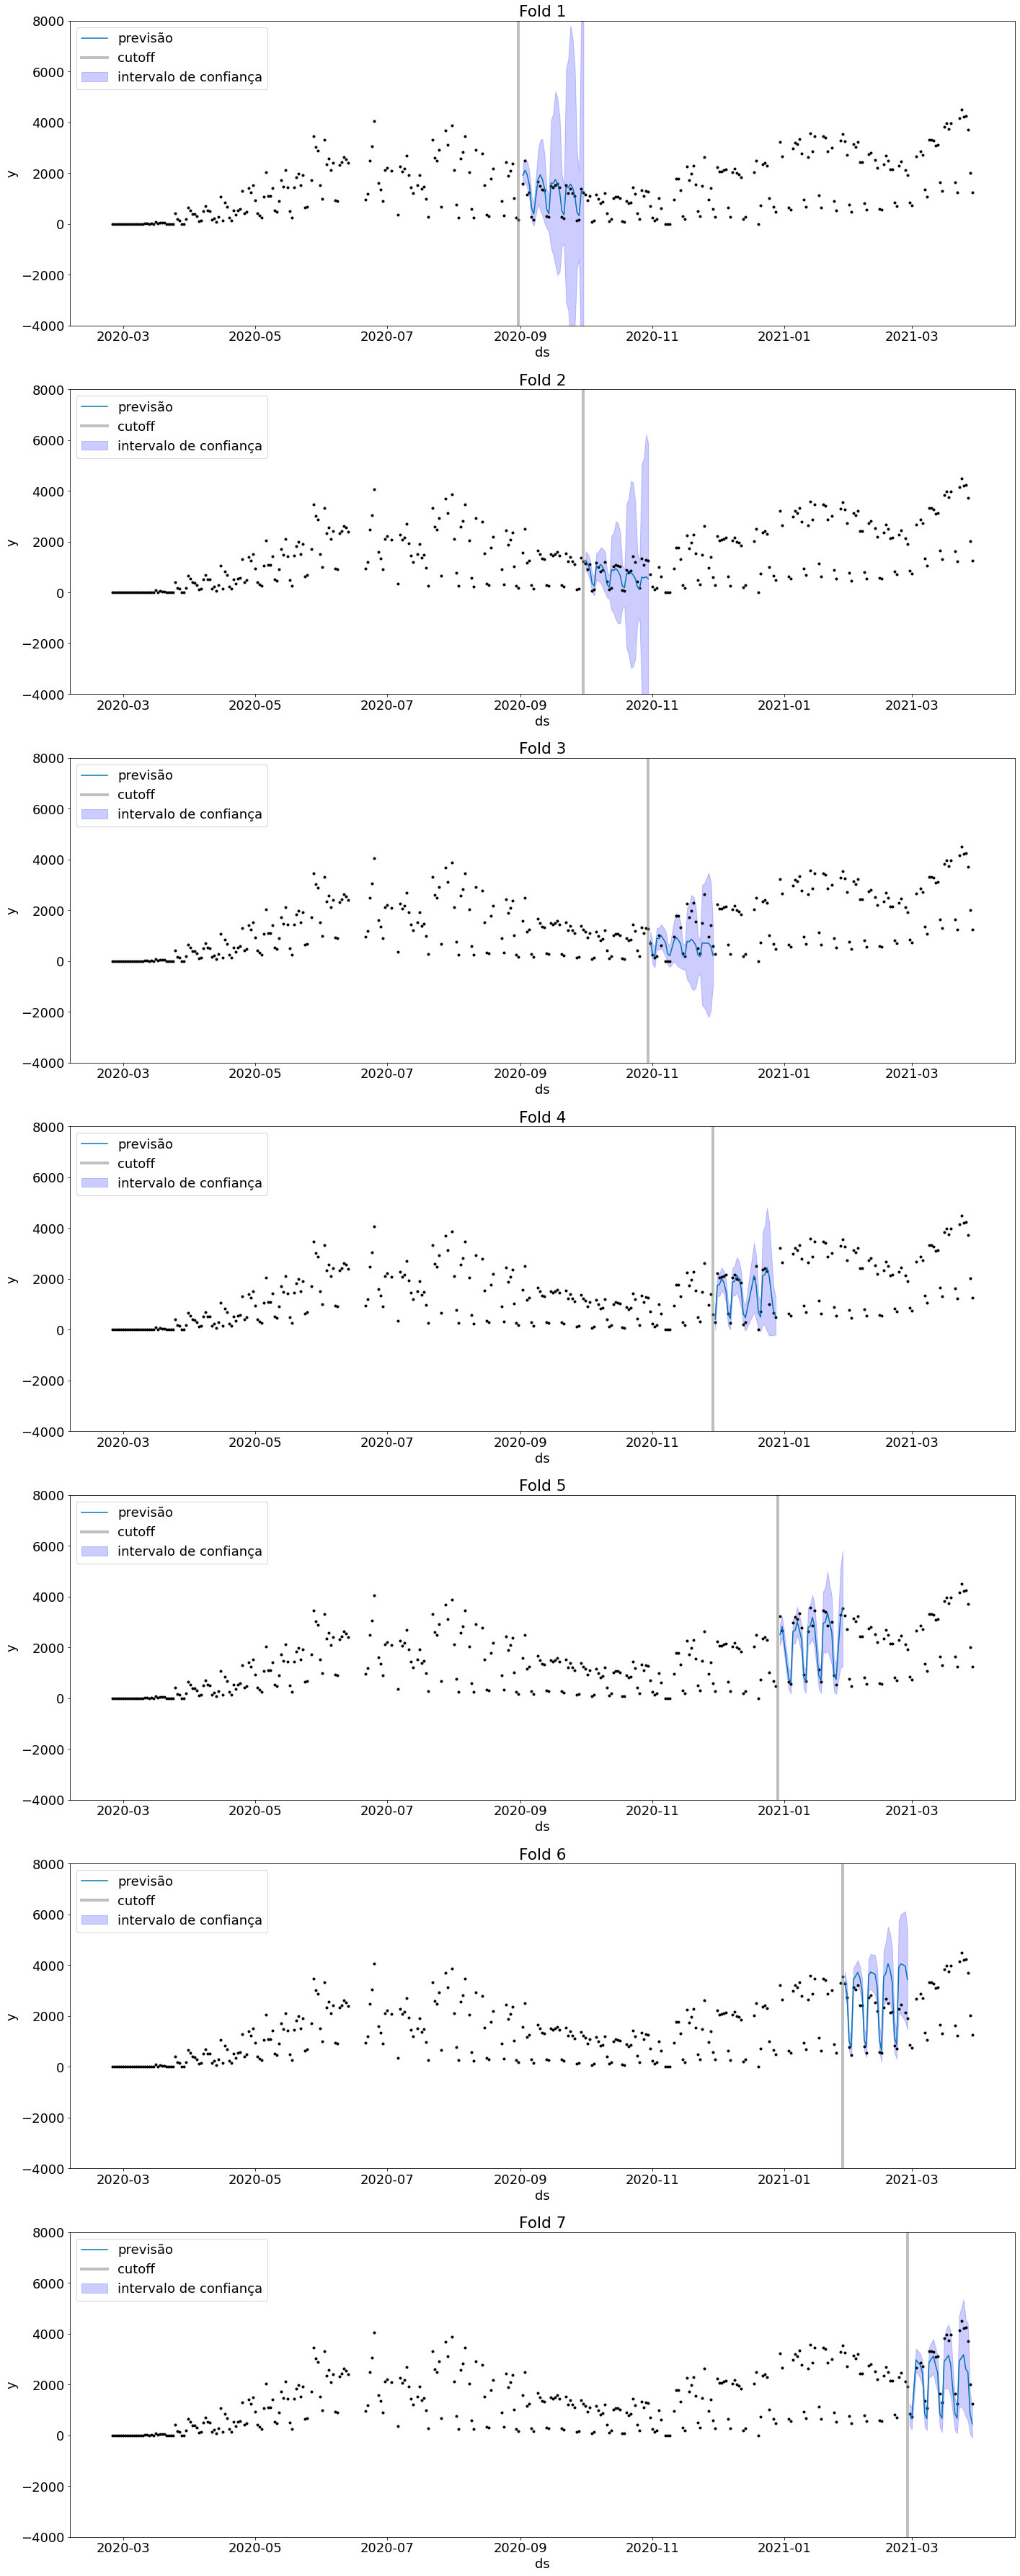

Um parâmetro importante é o parallel, ele é usado para o processamento do cross_validation ser feito de maneira diferente, por exemplo em paralelo, onde ele vai treinar e validar os modelos dos diferentes grupos simultaneamente. Isso é importante quando temos muitos dados e/ou grupos, tornando a tarefa sequencial muito longa.

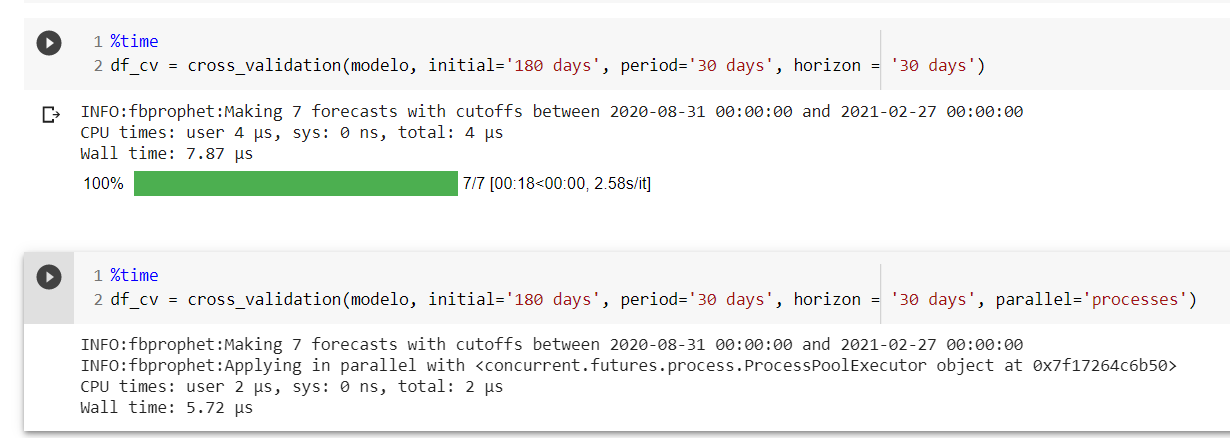

Os gráficos aqui apresentados tem seu código executados [notebook](https://colab.research.google.com/drive/1zE2QSZ4TElXdk_3H-PmAjg-KG_F47ZjL?usp=sharing#scrollTo=A8CmnZGB2Llo) que contém os conteúdos das aulas e deste Saiba Mais.

Com isso podemos notar a importância do cross validation na etapa de validação e busca do modelo ideal para o nosso problema. Recomendamos a leitura da [documentação do Prophet](https://facebook.github.io/prophet/docs/diagnostics.html) para conhecer ainda mais essa solução.

### Continuando.

**O que aprendemos:**

Tratamento de outliers;

Intervalo de confiança;

Validação cruzada de encadeamento direto;

Métricas de performance.

**Desafio 13:** Testar diferentes intervalos de confiança.

**Desafio 14:** Buscar quais métricas se aplicam a quais casos.